# Progetto di Basi di dati

## Random Tree Forest nella classificazione dei corpi celesti 

Marzio Della Bosca

mat: 306034

### Specifica del progetto: 
Lo scopo del progetto è quello di implementare un algoritmo di **Random Tree Forest** al fine di osservare la sua capacità di apprendimento e abilità nella classificazione di corpi celesti dividendoli in tre grandi gruppi sulla base della loro distanza dalla Terra. Il set iniziale da cui vengono acquisiti i dati è il catalogo di [Hipparcos](https://en.wikipedia.org/wiki/Hipparcos) scaricato dalla piattaforma [Kaggle](https://www.kaggle.com/). 

Le stelle verranno divise in tre gruppi:
- A: le stelle distanti dalla Terra fino a 400 anni luce.
- B: le stelle distanti da 400 anni luci fino ad un massimo di 800 anni luce.
- C: le stelle distanti dalla Terra più di 800 anni luce.

Dopo l'implementazione e la osservazione dei report del classificatore lo si metterà a confronto con l'algoritmo di **Random Tree Regressor** allenato sullo stesso set di training.

Per prima cosa importiamo le librerie, necessarie per il plottaggio dei grafici, l'addestramento dell'algoritmo, analisi dei dati ecc.

In [3]:
# Gestione dataset, dataframe, matrici, grafici, ecc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os

# Random Tree Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Tree Forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Importo i dati e li 'pulisco', eliminando le colonne che non hanno valori, le colonne contenenti i parametri non necessari all'addestramento e le colonne contenenti i parametri che non sono 'popolari': ovvero quelle colonne che non hanno valore per più del 90% degli elementi. Successivamente elimino gli elementi in cui sono rimasti dei parametri vuoti, in questo modo ottengo un set in cui tutti gli elementi hanno lo stesso numero di parametri degli altri.

Queste colonne fanno parte del catalogo astronomico Hipparcos, che contiene informazioni sulle stelle visibili dalla Terra. Ecco una breve descrizione dei parametri:

- "HIP": identificatore numerico univoco della stella Hipparcos.
- "Proxy": identificatore alternativo per la stella.
- "RAhms": ascensione retta della stella espressa in ore, minuti e secondi.
- "DEdms": declinazione della stella espressa in gradi, minuti e secondi.
- "Vmag": magnitudine visuale della stella (cioè la sua luminosità vista dalla Terra).
- "VarFlag": indicatore di variabilità della stella.
- "r_Vmag": precisione della magnitudine visuale.
- "RAdeg": ascensione retta della stella espressa in gradi.
- "DEdeg": declinazione della stella espressa in gradi.
- "AstroRef": riferimento bibliografico per le coordinate della stella.
- "Plx": parallasse della stella (cioè la variazione apparente della sua posizione rispetto alle stelle di sfondo, dovuta al movimento della Terra intorno al Sole).
- "pmRA": moto proprio della stella lungo l'ascensione retta.
- "pmDE": moto proprio della stella lungo la declinazione.
- "e_RAdeg": errore sull'ascensione retta della stella.
- "e_DEdeg": errore sulla declinazione della stella.
- "e_Plx": errore sulla parallasse della stella.
- "e_pmRA": errore sul moto proprio della stella lungo l'ascensione retta.
- "e_pmDE": errore sul moto proprio della stella lungo la declinazione.
- "DE:RA": covarianza tra declinazione e ascensione retta.
- "Plx:RA": covarianza tra parallasse e ascensione retta.
- "Plx:DE": covarianza tra parallasse e declinazione.
- "pmRA:RA": covarianza tra moto proprio lungo l'ascensione retta e ascensione retta.
- "pmRA:DE": covarianza tra moto proprio lungo l'ascensione retta e declinazione.
- "pmRA:Plx": covarianza tra moto proprio lungo l'ascensione retta e parallasse.
- "pmDE:RA": covarianza tra moto proprio lungo la declinazione e ascensione retta.
- "pmDE:DE": covarianza tra moto proprio lungo la declinazione e declinazione.
- "pmDE:Plx": covarianza tra moto proprio lungo la declinazione e parallasse.
- "F1": indice di bontà della soluzione orbitale.
- "F2": indice di bontà della soluzione astronomica.
- "---": indicatore di stelle con dati mancanti o incerti.
- "BTmag": magnitudine fotografica della stella nel filtro B.
- "e_BTmag": errore sulla magnitudine fotografica nel filtro B.
- "VTmag": magnitudine fotografica della stella nel filtro V.
- "e_VTmag": errore sulla magnitudine fotografica nel filtro V.
- "m_BTmag": indicatore di variabilità della magnitudine fotografica nel filtro B.
- "B-V": indice di colore della stella (differenza tra le magnitudini nel filtro B e V).
- "e_B-V": errore sull'indice di colore.
- "r_B-V": precisione dell'indice di colore.
- "V-I": indice di colore della stella (differenza tra le magnitudini nel filtro V e I).
- "e_V-I": errore sull'indice di colore.
- "r_V-I": precisione dell'indice di colore.
- "CombMag": magnitudine combinata della stella.
- "Hpmag": magnitudine media della stella.
- "e_Hpmag": errore sulla magnitudine media della stella.
- "Hpscat": scarto quadratico medio delle magnitudini Hpmag.
- "o_Hpmag": numero di osservazioni usate per calcolare la magnitudine media Hpmag.
- "m_Hpmag": indicatore di variabilità della magnitudine media Hpmag.
- "Hpmax": magnitudine massima della stella.
- "HPmin":magnitudine minima della stella.
- "Period": periodo di variazione della stella (se è una stella variabile).
- "HvarType": tipo di variabilità della stella (se è una stella variabile).
- "moreVar": indicatore di ulteriori informazioni sulla variabilità della stella.
- "morePhoto": indicatore di ulteriori informazioni sulle osservazioni fotometriche della stella.
- "CCDM": identificatore di un sistema binario o multiplo di stelle.
- "n_CCDM": numero di componenti del sistema binario o multiplo di stelle.
- "Nsys": numero di sistemi stellari multipli che coinvolgono questa stella.
- "Ncomp": numero di componenti di sistemi stellari multipli che coinvolgono questa stella.
- "MultFlag": indicatore di stelle in sistemi stellari multipli.
- "Source": fonte dei dati.
- "Qual": qualità dei dati.
- "m_HIP": indicatore di stelle multiple nel catalogo Hipparcos.
- "theta": posizione dell'angolo di posizione di un'eventuale compagna.
- "rho": separazione angolare dell'eventuale compagna.
- "e_rho": errore sulla separazione angolare dell'eventuale compagna.
- "dHp": differenza di magnitudine tra la stella principale e l'eventuale compagna.
- "e_dHp": errore sulla differenza di magnitudine tra la stella principale e l'eventuale compagna.
- "Survey": indicatore di osservazioni provenienti da diversi programmi di osservazione.
- "Chart": identificatore della carta stellare.
- "Notes": note sulle proprietà della stella.
- "HD": identificatore nel catalogo Henry Draper.
- "BD": identificatore nel catalogo Bonner Durchmusterung.
- "CoD": identificatore nel catalogo Cordoba Durchmusterung.
- "CPD": identificatore nel catalogo Cape Photographic Durchmusterung.
- "(V-I)red": indice di colore V-I corretto per l'effetto dell'estinzione interstellare.
- "SpType": tipo spettrale della stella.

In [ ]:
# Metodo per la lettura del file CSV attraverso il percorso relativo
stars_data_path = os.getcwd() + "\hipparcos.csv"
stars_data = pd.read_csv(stars_data_path)

print(f"Il numero di parametri contenuti nel file CSV è: {str(stars_data.shape[1])}, numero di elementi è: {str(stars_data.shape[0])}")

# Elimino i parametri che non sono utili ai fine del training dell'algoritmo come i riferimenti bibliografici della stella, il numero di osservazioni, ecc.
columns_to_drop = ['Proxy', 'AstroRef', 'Source', 'Qual']
stars_data = stars_data.drop(columns=columns_to_drop)

# Elimino i parametri che non hanno informazioni (NaN, o stringhe vuote) per più del 90% degli elementi, impostando il threshold
threshold = len(stars_data) * 0.9
cleaned_stars_data = stars_data.dropna(axis=1, thresh=threshold)
print(f"Numero di parametri: {str(cleaned_stars_data.shape[1])}, numero di elementi: {str(cleaned_stars_data.shape[0])}\n")

# Elimino gli elementi che hanno più del 90% delle colonne con stringhe vuote o valori nulli, in modo che tutti gli elementi abbiano lo stesso numero di parametri
cleaned_stars_data = cleaned_stars_data.dropna(axis=0, how='any')
print(f"Numero di parametri: {str(cleaned_stars_data.shape[1])}, numero di elementi: {str(cleaned_stars_data.shape[0])}\n")


Il dataset non contiene il parametro delle distanze, pertanto sfrutto la libreria **Simbad** e il parametro **HIP** contenuto nel dataset. L'HIP è il codice identificativo delle stelle, in utilizzo nel catalogo **Hipparcos**, Simbad è un database astronomico di oggetti esterni al sistema solare interrogabile da python. Qui procedo a definire il metodo 'get_distance_from_hip' in cui interrogo Simbad fornendogli i codici HIP dei miei elementi in modo da acquisirne le distanze convertendole da **ua** (unità astronomiche) in **al** (anni luce). Dopo aver creato il dataframe con le distanze elimino gli elementi con distanze pari a 0.0, infine salvo il nuovo dataframe in formato CSV.

**NOTA**: La creazione del nuovo set è un operazione che richiede del tempo (per via delle query a Simbad), pertanto le invio il file csv **hipparcos_distance.csv** in modo da poter valutare subito i blocchi successivi.

In [ ]:
from astroquery.simbad import Simbad    # Permette di interrogare il database SIMBAD
from astropy import units as u          # Permette di utilizzare le unità di misura

# Funzione per ottenere la distanza dalla Terra dato il codice HIP
def get_distance_from_hip(hip_code):
    custom_simbad = Simbad()
    custom_simbad.add_votable_fields('distance')
    result_table = custom_simbad.query_object(f"HIP {hip_code}")
    
    if result_table is not None and len(result_table) > 0:
        distance_pc = result_table['Distance_distance'][0]
        distance_ly = (distance_pc * u.pc).to(u.lyr)                       # Conversione da parsec a anni luce
        return distance_ly.value
    else:
        return None

# Creazione del nuovo DataFrame per il nuovo file CSV con le distanze dalla Terra
new_data = []
i = 0
for hip_code in cleaned_stars_data['HIP'].head(21000):                      # Limita l'iterazione ai primi 21000 elementi
    distance = get_distance_from_hip(hip_code)
    if distance is not None:
        i += 1
        print(f'(Elemento {i}/21000) Ottenuta distanza per HIP {hip_code}: {distance}  {str(round(100*i/21000))}% \n')
        element = cleaned_stars_data[cleaned_stars_data['HIP'] == hip_code].values.tolist()[0]
        element.append(distance)
        new_data.append(element)

new_columns = cleaned_stars_data.columns.tolist() + ['Distance']
new_df = pd.DataFrame(new_data, columns=new_columns)

# elimino gli elementi che non hanno la distanza dalla Terra, o che hanno distanza pari a 0.0
new_df = new_df[new_df['Distance'] != 0.0]

# Salvataggio del nuovo file CSV
new_csv_path = os.getcwd()  + "\hipparcos_distance.csv"  # Specifica il percorso e il nome del nuovo file CSV
new_df.to_csv(new_csv_path, index=False)




Implemento l'algoritmo di **Random tree forest**, elimino i parametri che sono in formato stringa e il parametro HIP che rappresenta il codice identificativo della stella (in modo da eliminare un po' di rumore), divido il dataset in feature (parametri) e target. Dopo aver definito le classi target popolandole con i valori target (y) divido il dataset in training set e test set: X_train e y_train rappresentano il training set utilizzato per addestrare il modello. X_train contiene le feature del training set, mentre y_train contiene le classi target corrispondenti. Invece X_test e y_test rappresentano il test set, che verrà utilizzato per valutare le prestazioni del modello. X_test contiene le feature del test set, mentre y_test contiene le classi target corrispondenti. Infine creo il modello, lo addestro, attuo delle previsioni sul test set e calcolo l'accuratezza.

Accuracy: 0.8779174147217235
                                 precision    recall  f1-score   support

              Distance < 400 ly       0.90      0.93      0.91      1257
              Distance > 800 ly       0.91      0.91      0.91      2177
Distance between 400 and 800 ly       0.81      0.80      0.81      1579

                       accuracy                           0.88      5013
                      macro avg       0.87      0.88      0.88      5013
                   weighted avg       0.88      0.88      0.88      5013



Text(113.9222222222222, 0.5, 'predicted label')

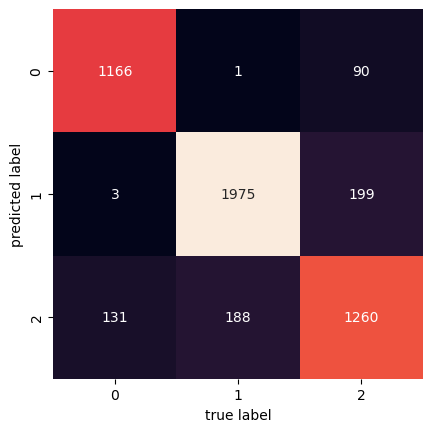

In [5]:
stars_data_path = os.getcwd() + "\hipparcos_distance.csv"
cleaned_stars_data = pd.read_csv(stars_data_path)

# Elimino i parametri che sono in formato stringa e il parametro HIP che rappresenta il codice identificativo della stella
valid_stars_data = cleaned_stars_data.select_dtypes(include=[int, float])

# Verifica la validità dei valori nelle colonne delle distanze
valid_mask = np.isfinite(cleaned_stars_data['Distance'])

# Filtra solo le righe con valori validi
valid_stars_data = valid_stars_data[valid_mask]

valid_stars_data = valid_stars_data.drop('HIP', axis=1)

# Divido il dataset in feature (X) e target (y)
X = valid_stars_data.drop('Distance', axis=1)                               # Rimozione del parametro delle distanze dal dataframe delle feature
y = valid_stars_data['Distance']                                            # Imposto il parametro distanza come parametro target

# Definisco le classi target in base alla distanza
y_class = []
for distance in y:
    if distance < 400:
        y_class.append('Distance < 400 ly')
    elif 400 <= distance <= 800:
        y_class.append('Distance between 400 and 800 ly')
    else:
        y_class.append('Distance > 800 ly')

# Divido il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, random_state=0)

# Creare e addestrare il modello di Random Forest
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

# Effettuare le previsioni sul test set
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred, y_test))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Nel blocco di codice precedente è stata attuata una classificazione su di un insieme di elementi, ora mediante l'algoritmo di **Random Forest Regressor** invece di predire a quale classe la stella x appartenga si predice il valore della distanza della stella.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Creazione e addestramento dell'algoritmo di Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcolo dell'errore medio quadratico e del coefficiente di determinazione
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Implemento un metodo per visualizzare la accuratezza del random tree regressor 
errors = abs(y_pred - y_test)
mape = errors / y_test
accuracy = 1 - np.mean(mape)
print('Accuracy:', accuracy)

Mean Squared Error: 349306.82809797354
R-squared Score: 0.727132434012343
Accuracy: 0.7345512296615546


Osserviamo che l'accuratezza dell'algoritmo di classificazione **Random Tree Forest** è superiore a quella del **Random Tree Regressor**. Questo dato è intuitivo perchè negli algoritmi di classificazione l'obiettivo è quello di associare ogni elemento alla sua classe di appartenenza, quindi il problema di classificazione è distinguere correttamente le diverse classi mentre nei problemi di regressione l'obiettivo non è classificare correttamente le istanze, ma predire valori numerici (continui), il che è più complicato.

Per quando riguarda l'errore quadratico medio (MSE) e il coefficente di determinazione R&#178; sono due metriche utilizzate per valutare i modelli di regressione. L'MSE è molto alto, nonostante l'accuratezza non sia troppo bassa, questo potrebbe essere dovuto al fatto che il caso di studio è il calcolo della distanza di corpi celesti, dato che si sta lavorando con distanze enormi. Il coefficente di determinazione R&#178; misura il legame tra la variabilità dei dati e la correttezza del modello utilizzato. Quindi un coefficiente R&#178; pari a circa lo 0.73 indica che il modello spiega il 73% della varianza presente nei dati target. Questo potrebbe significare che il modello si adatta bene al set di dati ma c'è ancora della varianza che il modello non è in grado di spiegare, potrebbe essere utile aumentare il numero di elementi nel data set. 

Di seguito eseguo un plot delle stelle rappresentate da dei punti colorati. I colori dei punti si riferiscono alla classe di appartenenza della stella:
- Rosso: stelle fino a una distanza di 400 al dalla Terra.
- Verde: stelle a una distanza tra 400 e 800 al dalla Terra.
- Blu:   stelle distanti più di 800 al dalla Terra.

E' stato scelto di plottare un grafico a dispersione polare perchè volevo dare un idea della posizione delle stelle relativa alla Terra, ho usato una scala logaritmica in base naturale in modo da riuscire a contenere i circa 20000 elementi del training set e settato il seed della generazione di numeri casuali in modo da avere una riproducibilità del grafico, il parametro theta mi serve in modo da non avere le stelle tutte su una singola retta ma ad avere una distribuzione di stelle non lineare, generando una serie di angoli compresi tra 0 e 2 $\pi$.

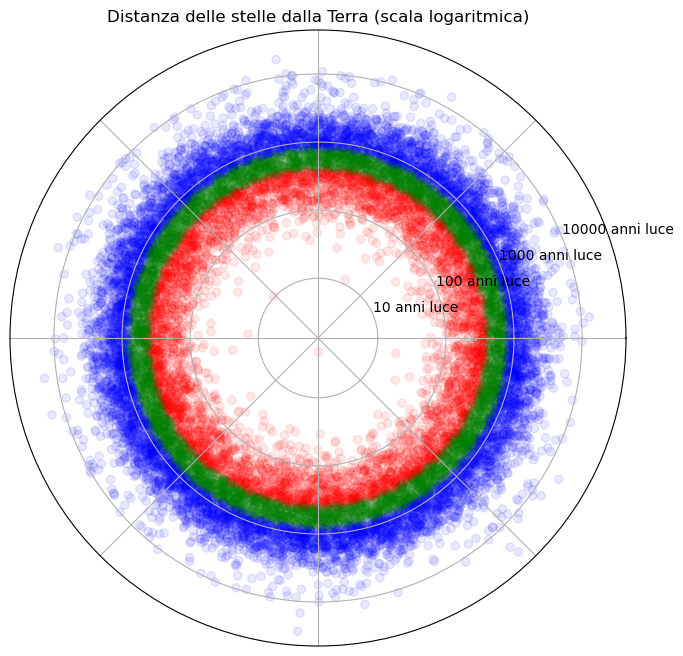

In [8]:
np.random.seed(123)  # Imposta il seed per la riproducibilità del plot

# Calcolo gli angoli per il plot
theta = np.random.rand(len(valid_stars_data)) * 2 * np.pi
r = np.log10(valid_stars_data['Distance'])

# Funzione per formattare le etichette degli assi radiali
def distance_formatter(x, pos):
    return f"{int(10**x)} anni luce"

# Creo una variabile per il colore in base alle distanze
colors = []
for distance in valid_stars_data['Distance']:
    if distance < 400:
        colors.append('red')
    elif distance <= 800:
        colors.append('green')
    else:
        colors.append('blue')

# Plot del grafico a dispersione polare con etichette delle distanze colorate
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.set_rticks(np.log10([1, 10, 100, 1000, 10000]))                      # Impostazione degli assi radiali su scala logaritmica naturale
ax.yaxis.set_major_formatter(FuncFormatter(distance_formatter))         # Applicazione della formattazione delle etichette
ax.set_xticklabels([])                                                  # Rimozione degli indici dei gradi
ax.scatter(theta, r, marker='o', color=colors, alpha=0.09)
ax.set_title("Distanza delle stelle dalla Terra (scala logaritmica)")
plt.show()